<a href="https://colab.research.google.com/github/eduardogil11/Desarrolllo-de-aplicaciones-avanzadas-Modulo-2-IA/blob/main/Data_augmentation_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation Pokemon

### Eduardo Rodríguez Gil - A01274913

De un Dataset que ya existia obtuve varias imágenes de los diferentes Pokemon que existen y cree mi propio Dataset clasificando a los Pokemon por 4 tipos Water, Fire, Grass y Electric.

Conectamos Drive y nuestra carpeta de Drive que previamente creeamos que contiene las imagenes de los Pokemon

In [30]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Actividad Data Augmentation Pokemon"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Actividad Data Augmentation Pokemon
augmented  images


En esta parte importamos las librerias que vamos a utilizar a lo largo del programa.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, models, layers

Utilizamos TensorFlow especificamente ImageDataGenerator para crear nuevas imágenes de las que contiene nuestro Dataset de Pokemon, donde le indicamos las características que queremos que tengan.

In [32]:
base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							  rescale = 1./255,
							  rotation_range = 40,
							  width_shift_range = 0.2,
							  height_shift_range = 0.2,
							  shear_range = 0.3,
							  zoom_range = 0.3,
							  horizontal_flip = True)

Después utilizamos el directorio de train para probar que efectivamente las imágenes se están modificando como lo indicamos anteriormente, para esto solo vamos a ser la prueba con una imágen aleatoria de nuestro Dataset y quise mostrar como se generarían 6 imágenes diferentes con ImageDataGenerator.

Found 153 images belonging to 4 classes.


<Figure size 640x480 with 0 Axes>

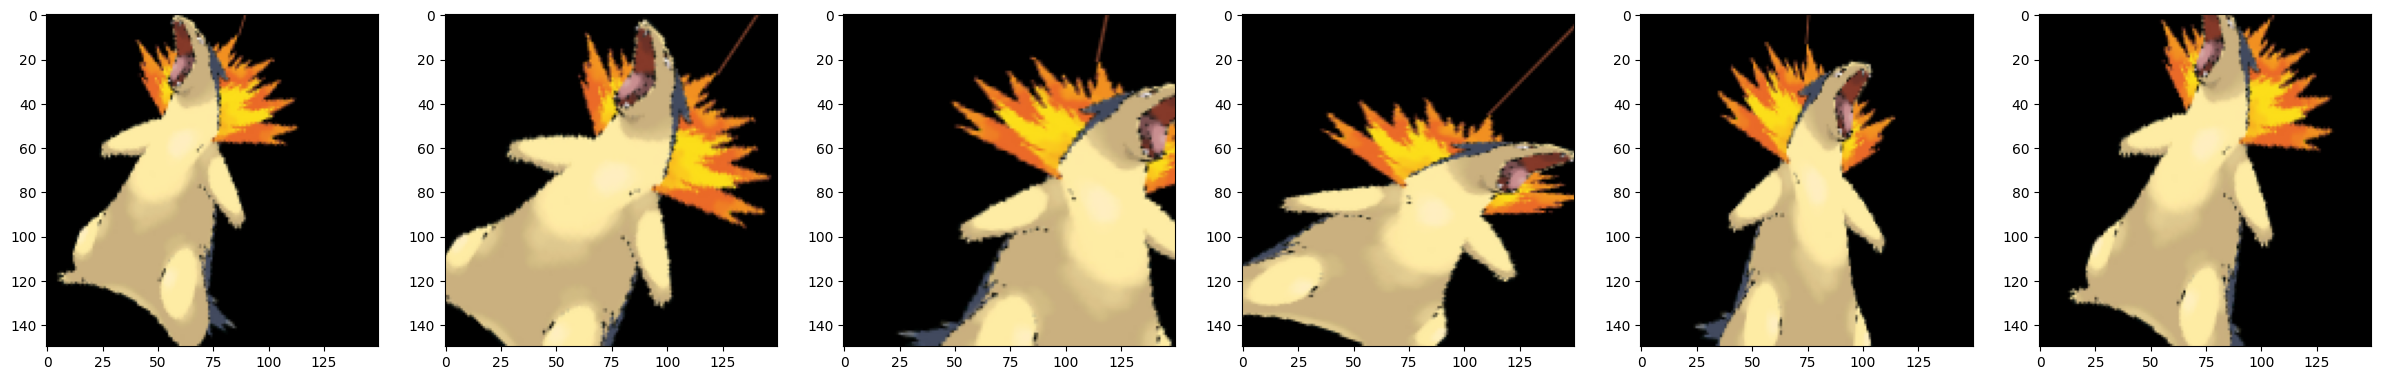

In [33]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 1,
									class_mode ='categorical')

plt.figure()
f, axarr = plt.subplots(1, 6, figsize=(30, 8)) 

for i in range(6) :
  axarr[i].imshow(train_generator[0][0][0])

Para este punto vamos a realizar lo mismo que realizamos anteriormente pero ahora mostrando 10 imágenes que se modificarán solo una vez y como podemos observar agarra aleatoriamente de nuestro Dataset de cualquier tipo de Pokemon.

Found 153 images belonging to 4 classes.
(10, 150, 150, 3)


<Figure size 640x480 with 0 Axes>

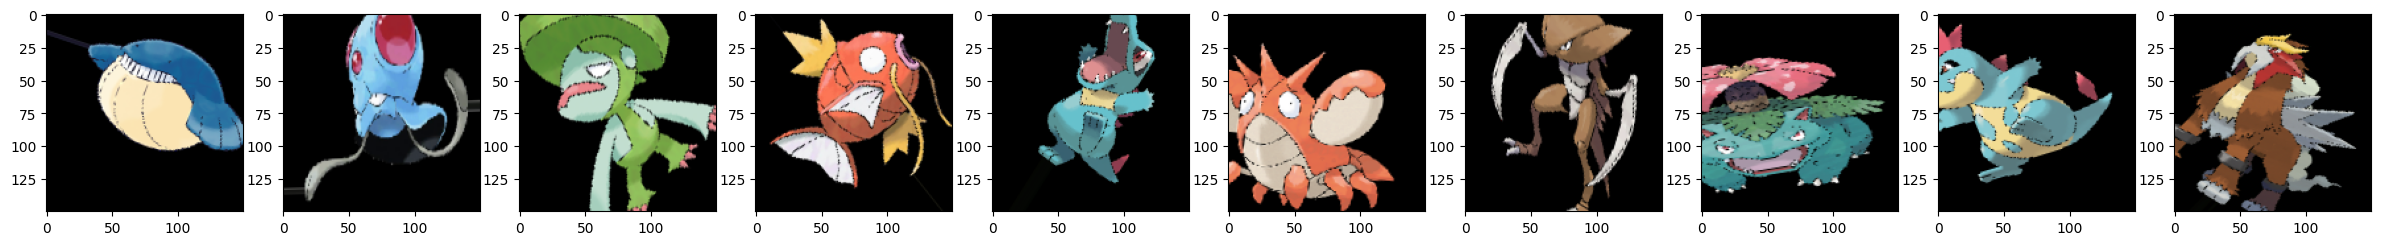

In [34]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 10,
									class_mode ='categorical')

images , labels = train_generator[0]

print(images.shape)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

Aquí vamos a indicarle que nos guarde todas nuestras imágenes que se generen por el ImageDataGenerator en una carpeta ya antes creada llamada augmented, aún que la podemos llamar como queramos. Esto nos servira si es que queremos posteriormente revisar con que imágenes entreno el modelo y como fueron las nuevas imágenes que género.

In [35]:
train_generator = train_datagen.flow_from_directory(
									train_dir,
									target_size = (150, 150),
									batch_size = 8,
									class_mode ='categorical',
									save_to_dir= path + '/augmented',   
             		 	save_prefix='aug',
              		save_format='png')

Found 153 images belonging to 4 classes.


En este apartado vamos a crear un modelo simple por el momento, solo para ver como funciona el procesado de los datos y para poder mostrar las nuevas imágenes que se enviaran a la carpeta augmented ya antes mencionada. Este modelo sera trabajado más adelante, para mejorarlo y poder obtener un mejor acurracy.

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_3 (Flatten)         (None, 219040)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               56074496  
                                                                 
 dense_7 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 56,075,804
Trainable params: 56,075,804
Non-trainable params: 0
_________________________________________________________________


Aquí vamos a indicar la cantidad de epocas donde por el momento vamos a poner solo 10 para que no tarde mucho el proceso, ya que ahorita buscamos ver el procesado, para cuando mejoremos el modelo se utilizara más epocas para poder obtener un mejor accuracy. En esta parte también imprimimos gráficas de como fue evolucionando nuestro modelo en cuanto a accuracy y loss.

Epoch 1/10
20/20 [==============================] - 23s 1s/step - loss: 3.2815 - acc: 0.4444
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 0.5789 - acc: 0.5752
Epoch 3/10
20/20 [==============================] - 20s 1s/step - loss: 0.4421 - acc: 0.5882
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 0.4129 - acc: 0.6471
Epoch 5/10
20/20 [==============================] - 22s 1s/step - loss: 0.3983 - acc: 0.6601
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 0.3680 - acc: 0.6405
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 0.3703 - acc: 0.6601
Epoch 8/10
20/20 [==============================] - 22s 1s/step - loss: 0.3699 - acc: 0.6732
Epoch 9/10
20/20 [==============================] - 21s 1s/step - loss: 0.3379 - acc: 0.6732
Epoch 10/10
20/20 [==============================] - 22s 1s/step - loss: 0.3362 - acc: 0.7059


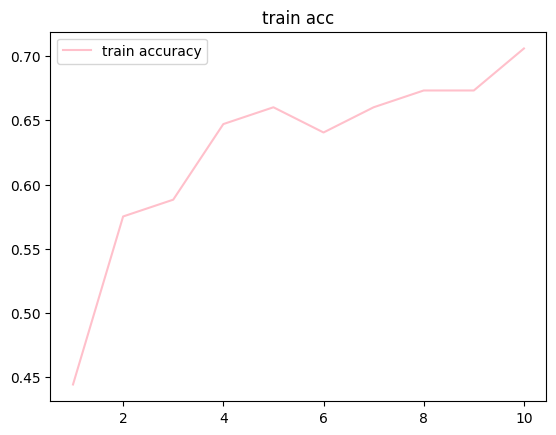

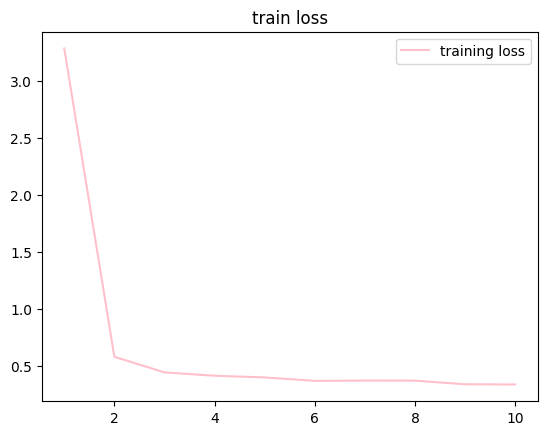

In [37]:
history = model.fit(train_generator, epochs = 10)
			
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'-',label='train accuracy', color='pink')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(epochs,loss, '-', label ='training loss', color='pink')
plt.title('train loss')
plt.legend()
plt.show()

Por último, mostramos nuestros resultados obtenido.

In [38]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
								 test_dir,
								 target_size = (150, 150),
							   batch_size = 20,
								 class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :', test_acc)

Found 56 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


 3/25 [==>...........................] - ETA: 1:51 - loss: 71.9598 - acc: 0.6964

25/25 [==============================] - 11s 426ms/step - loss: 71.9598 - acc: 0.6964

test acc : 0.6964285969734192
